# Titanic - Machine Learning from Disaster

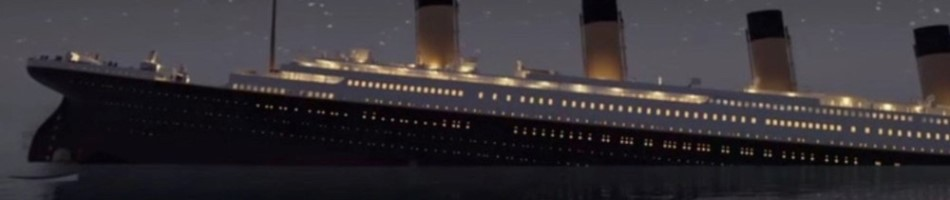

Vamos utilizar o <a href="https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv">dataset disponível no Kaggle</a>
- Ele é usado para competição.
- Classificação tipo binária.

In [374]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [375]:
# Importando a base
import pandas as pd
arquivo = '/content/drive/MyDrive/titanic_competition/titanic_train.csv'
arquivo2 = '/content/drive/MyDrive/titanic_competition/titanic_test.csv'

treino = pd.read_csv(arquivo)
teste = pd.read_csv(arquivo2)

### Começaremos a Limpeza nos dados de Treino

In [376]:
# Visualizando a base
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [377]:
# Verificando valores faltantes
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [378]:
# As informações da base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Vamos tratar a coluna com menos valores vazios, **Embarked**.
Neste caso em específico, nós temos as informações de cada um dos passageiros do Titanic na internet: <br>
Dados da **Amelia**: <br>
https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
<br>
Dados da **Martha**:<br>
https://www.geni.com/people/Martha-Stone/6000000016198773132
<br><br>
Se tivessemos fazendo um **projeto dentro da empresa**, nesses casos consutariamos aqueles que teriam tal informação faltante, ou seja, entrariamos em contato com o **Negócio**.

In [379]:
# Identificando os valores presentes nas colunas
treino.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Embarked**:<br>
C = Cherbourg, Q = Queenstown, S = Southampton.

In [380]:
# Filtrando valores nulos
treino.loc[treino.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [381]:
# Substituindo valores
treino.loc[treino.Embarked.isnull(), 'Embarked'] = 'S'

In [382]:
# Confirmando resultados
treino.loc[treino.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Vemos que na base de teste não existe valores nulos na coluna **Embarked**.<br>
Caso existisse seria feito o mesmo tratamento.

In [383]:
# Verificando na base de teste
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [384]:
# Visualizando valores vazios restantes:
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Agora trataremos os valores vazios da coluna **Age**.<br>
Temos **177 valores vazios** presentes nessa coluna, poderiamos pesquisar um a um na internet e ir obtendo as idades; porém com o **intuito de ser mais rapído**, faremos o tratamento da melhor maneira possível usando **somente a base**.

In [385]:
# Visualizando as informações estatísticas da coluna
treino.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

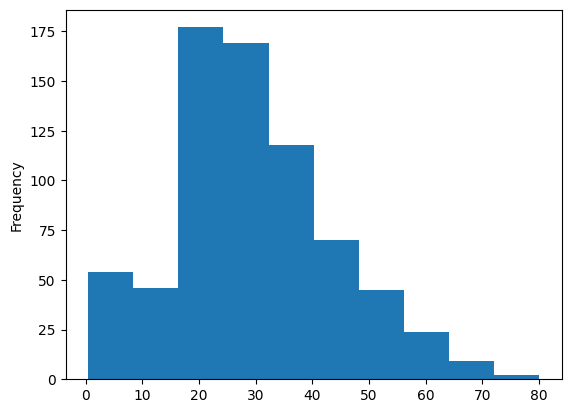

In [386]:
# Visualizando em forma de gráfico
treino.Age.plot.hist();

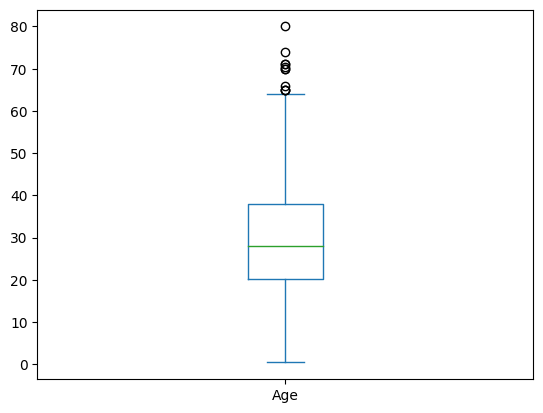

In [387]:
# Em forma de boxplot
treino.Age.plot.box();

Pelo que tudo indica, as idades estão bem distribuídas, poderiamos preencher os **valores vazios** com a **média** ou **mediana** dessa coluna; porém vamos ser mais precisos relacionando-a com outras colunas da base.

In [388]:
treino.groupby('Pclass')['Age'].agg(['mean', 'count'])

,mean,count
Pclass,,
1,38.233441,186
2,29.877630,173
3,25.140620,355


Agora entendemos melhor os gráficos anteriores, que informavam uma concentração maior de pessoas com idade entre 20 e 30 anos, **aparantemente** a maioria de pessoas entre essas idades foram de 3 classe.

In [389]:
treino.groupby(['Pclass', 'Sex'])['Age'].agg(['mean', 'count'])

mean  count
Pclass Sex                     
1      female  34.611765     85
       male    41.281386    101
2      female  28.722973     74
       male    30.740707     99
3      female  21.750000    102
       male    26.507589    253

In [390]:
treino[['Name', 'Age', 'Sex']]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male


É possível observar que cada um dos passageiros possuem **Títulos**(Mr, Miss, Rev, Mrs e etc), podemos analisar qual a relação desses títulos com a variável alvo (Age). <br>
Os títulos estão presentes entre a **vírgula (',')** e o **ponto ('.')**, podemos utilizar isso a nosso favor.

In [391]:
# Usando o 'find' para encontrar a primeira ocorrência da vírgula
treino.Name.str.find(',')

0      6
1      7
2      9
3      8
4      5
      ..
886    8
887    6
888    8
889    4
890    6
Name: Name, Length: 891, dtype: int64

In [392]:
# E agora para o ponto
treino.Name.str.find('.')

0      10
1      12
2      15
3      13
4       9
       ..
886    13
887    12
888    14
889     8
890    10
Name: Name, Length: 891, dtype: int64

In [393]:
# Escolhendo um dos indices para verificar a veracidade dessa info
treino.Name[1][7+2:12]

'Mrs'

Fazer isso um a um seria trabalhoso, portanto iremos criar uma **função** especifica para encontrar títulos.

In [394]:
# Função que busca títulos em cada nome
def encontra_titulos(texto):
  return texto[texto.find(',')+2 : texto.find('.')]

In [395]:
# Criando uma coluna comente com os títulos de cada pessoa
treino['Titulos'] = treino.Name.apply(encontra_titulos)

In [396]:
# Vendo os valores mais frequentes
treino.Titulos.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Titulos, dtype: int64

Como são muitos títulos com pouca frequência, eles não possuem muita validade estatística para o nosso modelo.

In [397]:
# Função para fazer a categorização
def categorizar(titulo):
  lista_aceita = ['Mr', 'Miss', 'Mrs', 'Master']

  if titulo in lista_aceita:
    return titulo
  else:
    return 'Outros'

In [398]:
# Aplicando a função e corrigindo os infrequentes
treino['Titulos'] = treino.Titulos.apply(categorizar)

In [399]:
# Confirmando alterações
treino.Titulos.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Outros     27
Name: Titulos, dtype: int64

In [400]:
# Acrescentando a coluna Titulos no agrupamento
treino.groupby(['Pclass', 'Sex', 'Titulos'])['Age'].mean().reset_index()

,Pclass,Sex,Titulos,Age
0,1,female,Miss,30.000000
1,1,female,Mrs,40.882353
2,1,female,Outros,33.666667
3,1,male,Master,5.306667
4,1,male,Mr,41.580460
5,1,male,Outros,48.727273
6,2,female,Miss,22.390625
7,2,female,Mrs,33.682927
8,2,female,Outros,28.000000
9,2,male,Master,2.258889


In [401]:
# Visualizando o resultado do 'transform'
treino.groupby(['Pclass', 'Sex', 'Titulos'])['Age'].transform('mean')

0      28.724891
1      40.882353
2      16.123188
3      40.882353
4      28.724891
         ...    
886    42.000000
887    30.000000
888    16.123188
889    41.580460
890    28.724891
Name: Age, Length: 891, dtype: float64

In [402]:
# Filtrando valores vazios, e subtituindo pelo resultado do transform
treino['Age'] = treino.Age.fillna(treino.groupby(['Pclass', 'Sex', 'Titulos'])['Age'].transform('mean'))

In [403]:
# Visualizando o resultado
treino[(treino.Pclass == 3) & (treino.Titulos == 'Mr') & (treino.Sex == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulos
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,28.724891,0,0,330877,8.4583,NaN,Q,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,NaN,S,Mr
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.000000,0,0,349212,7.8958,NaN,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,28.724891,0,0,349217,7.8958,NaN,S,Mr
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,7.8958,NaN,S,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr


Agora que tratamos a coluna **Age** iremos remover a coluna **Titulos** que foi **utilizada apenas para sermos mais precisos no tratamento**.

In [404]:
treino = treino.drop('Titulos', axis=1)

In [405]:
# Valores vazios restantes
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [406]:
# Verificando a cardinalidade dessa coluna
treino.Cabin.nunique()

147

In [407]:
treino.Cabin.value_counts(dropna=False, normalize=True).mul(100)

NaN            77.104377
C23 C25 C27     0.448934
G6              0.448934
B96 B98         0.448934
C22 C26         0.336700
                 ...    
E34             0.112233
C7              0.112233
C54             0.112233
E36             0.112233
C148            0.112233
Name: Cabin, Length: 148, dtype: float64

Note que **77% dos valores** presentes nessa coluna são **nulos**, Portanto vamos simplificar o tratamente removendo essa coluna.

In [408]:
# Removendo coluna
treino = treino.drop('Cabin', axis=1)

Agora, inicaremos a **Limpeza na base de teste.**

In [409]:
# Vendo valores nulos
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [410]:
# Criando a coluna com os Titulos
teste['Titulos'] = teste.Name.apply(encontra_titulos)

In [411]:
# Categorizando os valores
teste['Titulos'] = teste.Titulos.apply(categorizar)

In [412]:
# Filtando os vazios e substituindo pela média
teste['Age'] = teste.Age.fillna(teste.groupby(['Pclass', 'Sex', 'Titulos'])['Age'].transform('mean'))

In [413]:
# Vendo o resultado
teste.Titulos.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Outros      7
Name: Titulos, dtype: int64

In [414]:
# Ainda temos um valor nulo
teste[teste.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulos
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Outros


In [415]:
teste.groupby(['Pclass', 'Sex', 'Titulos'])['Age'].mean()

Pclass  Sex     Titulos
1       female  Miss       31.428571
                Mrs        45.606061
                Outros     39.000000
        male    Master      9.500000
                Mr         41.200000
                Outros     51.000000
2       female  Miss       17.370000
                Mrs        33.000000
        male    Master      5.000000
                Mr         31.718182
                Outros     35.500000
3       female  Miss       19.872647
                Mrs        29.875000
                Outros           NaN
        male    Master      7.454615
                Mr         27.198795
Name: Age, dtype: float64

É possível observar que esse valor é o único com essas características, por isso não deu para calcular a média.
Essa é uma informação que **não estava presente na base de treino**.

In [416]:
teste.loc[(teste.Pclass == 3) & (teste.Sex == 'female') & (teste.Titulos == 'Outros')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulos
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Outros


Vamos substituir pela média de idades de mulheres que estavam na terceira classe.

In [417]:
# Obtendo a média
teste.loc[(teste.Pclass == 3) & (teste.Sex == 'female'), 'Age'].mean()

23.112845898922952

In [418]:
# Filtrando e substituindo
teste.loc[teste.Age.isnull(), 'Age'] = teste.loc[(teste.Pclass == 3) & (teste.Sex == 'female'), 'Age'].mean()

In [419]:
# Confirmando resultado
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Titulos          0
dtype: int64

In [420]:
# Verificando características desse valor vazio
teste[teste.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulos
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


Sendo apenas um valor vazio nessa coluna,para simplificar iremos substituir pela moda, tentando ser o **mais específico possível**.

In [421]:
# Obtendo moda
moda = teste.loc[(teste.Pclass == 3) & (teste.Sex == 'male') & (teste.Titulos == 'Mr'), 'Fare'].mode()[0]

Assim como feito na base de treino, faremos o mesmo na de teste, removeremos a coluna **Titulos**.

In [422]:
# Dropando a coluna que ja foi usada
teste = teste.drop('Titulos', axis=1)

In [423]:
# Substituindo pela moda
teste.loc[teste.Fare.isnull(), 'Fare'] = moda

In [424]:
# Valores nulos restantes
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [425]:
teste.Cabin.value_counts(dropna=False, normalize=True).mul(100)

NaN                78.229665
B57 B59 B63 B66     0.717703
C89                 0.478469
C116                0.478469
C80                 0.478469
                     ...    
E45                 0.239234
E52                 0.239234
B58 B60             0.239234
C62 C64             0.239234
C105                0.239234
Name: Cabin, Length: 77, dtype: float64

Semelhantemente a base de treino, para simplificar removeremos a coluna **Cabin** da base.

In [426]:
# Removendo coluna
teste = teste.drop('Cabin', axis=1)

In [427]:
treino.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# Inicio do tratamento das colunas de texto:

### Será utilizado o **OneHotEncoder** do sklearn para tratar a coluna que **não possui relação de ordem**
- OneHotEncoder:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [428]:
# Importando e criando o objeto onehot
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', dtype='int32')

In [429]:
# Ajustando os dados
ohe = ohe.fit(treino[['Embarked']])

In [430]:
# Transformando o resultado em um DataFrame do pandas
ohe_df = pd.DataFrame(
    ohe.transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out(),
)

In [431]:
# Concatenando com os dados da base principal
treino = pd.concat([treino, ohe_df], axis=1)

In [432]:
# Dropando Embarked depois da transformação
treino = treino.drop('Embarked', axis=1)

In [433]:
# Visualizando o resultado
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1


Para simplificar o processo, usaremos uma **função lambda** para tratar a coluna **Sex**.

In [434]:
# Criando a nova coluna com a verificação
treino['male_check'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [435]:
# Dropando a coluna de texto
treino = treino.drop('Sex', axis=1)

### Agora, fazendo o mesmo com a base de **teste**.

In [436]:
# Transformando em um DataFrame
ohe_df = pd.DataFrame(
    ohe.transform(teste[['Embarked']]).toarray(), columns=ohe.get_feature_names_out()
    )

In [437]:
# Concatenando os resultados
teste = pd.concat([teste, ohe_df], axis=1)

In [438]:
# Aplicando a função lambda
teste['male_check'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [439]:
# Dropando as duas colunas que foram transformadas
teste = teste.drop(['Sex', 'Embarked'], axis=1)

In [440]:
# Visualizando resultado
teste.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1,0


Nesse ponto, a coluna **Name** não se faz mais necessária, então removeremos.
A coluna **Ticket** possui **76% de valores unicos**, isso no contexto de **Machine Learning dificulta a generalização**.

In [441]:
treino.Ticket.nunique()/treino.shape[0]

0.7643097643097643

In [442]:
treino = treino.drop(['Name', 'Ticket'], axis=1)
teste = teste.drop(['Name', 'Ticket'], axis=1)

## Trabalharemos com 3 modelos de Classificação diferentes.
**Utilizaremos os valores padrões de cada modelo**
- Árvore de Decisão (Classificação):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


- KNN(Classificação dos vizinhos mais próximos):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Regressão Logística:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br>

### Vamos separar a base em treino e validação
- Será usado o **train_test_split:** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [443]:
# Separando X e y
X = treino.drop(['PassengerId','Survived'], axis=1)
y = treino.Survived

In [444]:
# Importando e separando a base
from sklearn.model_selection import train_test_split

RANDOM_STATE = 1

X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=RANDOM_STATE, test_size=0.30
)

In [445]:
# Importando a Árvore de Classificação
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Fazendo o fit:
clf_tree = clf_tree.fit(X_train, y_train)

# Fazendo a previsão
y_pred_tree = clf_tree.predict(X_val)

In [446]:
# Importando o KNN
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)

# Fazendo o fit:
clf_knn = clf_knn.fit(X_train, y_train)

# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

In [447]:
# Importando a Regressão Logística
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=RANDOM_STATE, max_iter=500)

# Fazendo o fit:
clf_log = clf_log.fit(X_train, y_train)

# Fazendo a previsão
y_pred_log = clf_log.predict(X_val)

# E, para finalizar, vamos avaliar esses modelos
### Para fazer essa análise, podemos usar:
- **Acurácia** (método de avaliação usado na competição):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html <br>
- **Matriz de confusão** (ajuda a visualizar a distribuição dos erros):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
- **Erro Quadrático Médio** (para avaliar o erro):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [448]:
# Importando as métricas de avaliação:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, mean_squared_error
)

In [449]:
# Usando Acurácia para a Árvore de Decisão
accuracy_score(y_val, y_pred_tree)

0.7276119402985075

In [450]:
# Para KNN
accuracy_score(y_val, y_pred_knn)

0.6940298507462687

In [451]:
# Para RL
accuracy_score(y_val, y_pred_log)

0.7910447761194029

- Usando a **matrix de confusão**

In [452]:
# Para a Árvore de Decisão
confusion_matrix(y_val, y_pred_tree)

array([[123,  30],
       [ 43,  72]])

In [453]:
# Para KNN
confusion_matrix(y_val, y_pred_knn)

array([[122,  31],
       [ 51,  64]])

In [454]:
# Para RL
confusion_matrix(y_val, y_pred_log)

array([[133,  20],
       [ 36,  79]])

- Usando o **erro quadrático médio**

In [455]:
# Para Árvore de Decisão
mean_squared_error(y_val, y_pred_tree)

0.27238805970149255

In [456]:
# Para KNN
mean_squared_error(y_val, y_pred_knn)

0.30597014925373134

In [457]:
# Para RL
mean_squared_error(y_val, y_pred_log)

0.208955223880597

## Fazendo previsão para os dados de teste
- Vamos ficar com o modelo de melhor acurácia.

In [458]:
# Verificando as colunas usadas no fit do modelo:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check
114,3,17.000000,0,0,14.4583,1,0,0,0
874,2,28.000000,1,0,24.0000,1,0,0,0
76,3,28.724891,0,0,7.8958,0,0,1,1


In [459]:
# Comparando com as colunas na base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check
0,892,3,34.5,0,0,7.8292,0,1,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,1


In [460]:
# Separando os dados para fazer a previsão
X_test = teste.drop('PassengerId', axis=1)

In [461]:
print(X_train.columns)
print(X_test.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'male_check'],
      dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'male_check'],
      dtype='object')


In [462]:
# Fazendo a previsão para os dados de teste
y_pred = clf_log.predict(X_test)

In [463]:
# Atribuindo o resultado e criando a coluna Survived
teste['Survived'] = y_pred

In [464]:
# Separando as colunas de interesse para a competição
base_kaggle = teste[['PassengerId', 'Survived']]

In [465]:
# Exportando arquivo csv.
base_kaggle.to_csv('resultado_e2.csv', index=False)